# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [39]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
print prices.head()
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64
Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [12]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
- Higher RM should increase the value of the house, since a higher number of average rooms in the neighborhood indicates a comparitively more affluent area.
- Higher LSTATE should decrease the value of the house, since a higher percentage of "working poor" homeowners indicates a comparitively less affluent area.
- Higher PTRATIO should decrease the value of the house, since a higher students to teacher ratio indicates a comparitively lower ranked school district.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [17]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [18]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

0.922855648536
Model has a coefficient of determination, R^2, of 0.923.


**Answer:** Yes, the model captures the variation of the target variable quite well, since the R^2 value is more than 0.9

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [19]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
* The objective of training a model on available data is to obtain something that helps us make "good" predictions on unseen data (or future data, in the case of time-based dataset).
* If the model is trained using all of the available data, it may perform quite well on the available data and predictions made on the available data points may have high accuracy. But, it does not gaurantee a similarly good performance on the unseen data. By training on the available data, we could overfit the model to perform well on the existing data while it may not capture the general variablity in the data and perform poorly on new data points. By definition, we do not have the unseen data and there is no way to know how well the trained model will behave for new data points.
* To solve this problem, we set aside some part of the available data and do not use it for training the model. This data - also called test data - then acts as a good simulation for the unseen data, with the benefit of knowing the target variable and so helping us know the accuracy (and other metrics) when the model is evaluated on these test data points.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

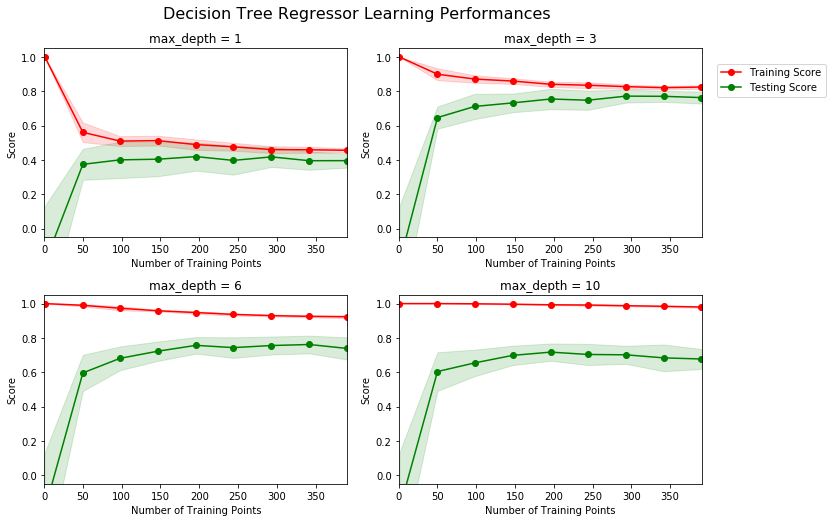

In [21]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

* In the graph for max-depth=3:
* The training curve score improves as the number of training points increases and plateaus after 300 points. 
* The testing curve score on the other hand decreases and plateaus as well. 
* Adding more points after 300 will not benefit the model, and in fact may lead to worse performance if a significantly higher number of training points are used compared to te testing points.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

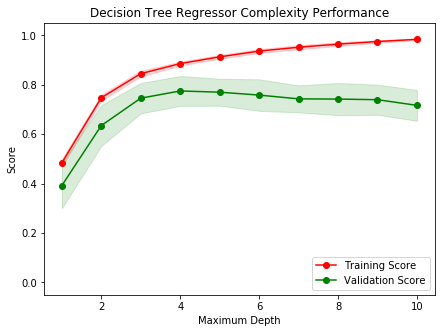

In [22]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

* At max-depth=1, the model has high bias. Both training and validation scores are low so the model is not capturing the variance of the data well.
* At max-depth=10, the model suffers from high variance. The model is over complex, is overfitted and explains all the variance in the training set with a high score - almost 1.0. It gives a very a low score on the validation set since it is not able to generalize well due to overfittin on the training set.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

* max-depth=4 best generalizes to the unseen data (validation set). The validation score reaches a peak at that point, and the training and validation scores are not too far apart. So the model at that max-depth generalizes well to the validation set.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

* The grid search technique is a helpful way to evaluate and compare model performances for different parameters and their combinations. For example, we could do a k-fold cross-validation for a decision tree model. Grid search would help us specify different values of k and max-depth to compare performance of models for each combination of those parameters.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

* k-fold cross-validation technique is used to validate the model when the available data is limited to get a sufficiently large validation set. The available dataset is divided into k equal chunks of data. The model is trained k times and each time one of the chunks is used as the validation dataset while the rest of the data is used for training. The model performances is the aggregate of the k training exercises. This way, the entire dataset is used for training as well as validation while avoiding the pitfalls of overfitting the model to the training dataset.

* When using grid-search to optimize model parameters, k-fold cross-validation helps in avoiding overfitting to the data. Without k-fold cv, we may end up running all model performance metrics on the same dataset each time, which could result in a particular combination of parameteres performing well on the training dataset while not generalizing well over the test dataset. In other words, we can minimize the "bias" in the model by using k-fold cv while selecting the best model with grid-search. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [25]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [26]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

0.365760327663
0.50632287824
0.289374416662
0.206674024144
0.441012859035
0.377228139191
0.327002196032
0.46408313206
0.445820187574
0.498009448886
0.596455712486
0.61449527193
0.551644413704
0.457863358782
0.727678324477
0.646475501926
0.61657559601
0.692578535132
0.711942957451
0.73299922555
0.77496891417
0.693715045685
0.683941436565
0.609810798318
0.765226013963
0.785973638905
0.73976419724
0.782613385717
0.797696572139
0.82396998327
0.817556164156
0.742796350428
0.704025340159
0.662966146962
0.741796136904
0.763666357149
0.80567828907
0.809607637929
0.842435248589
0.863965249349
0.806953080627
0.732998366045
0.70706260164
0.671853983565
0.763873794047
0.774274587218
0.80493249823
0.754939096345
0.825643801653
0.866498041063
0.822616031269
0.707641655281
0.673417501364
0.673612668033
0.746581542004
0.783561992913
0.783728240311
0.77495034525
0.719565912528
0.830571056763
0.796257764444
0.709777407247
0.595990333377
0.674213682036
0.766179457066
0.786768019498
0.761179079094
0.77809

**Answer: **

* The optimal model has a max_depth of 4. This is the same as what was guessed earlier.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [27]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**Answer: **

* Predicted selling price for Client 1's home is 391,183.33 USD, for Client 2's home is 189,123.53 USD and for Client 3's home is 942,666.67 USD.

The prices obtained by the model for the client data look quite reasonable.
* Effect of features
 - Number of rooms: As hypothesised earlier, increase in number of rooms should correspond to an increase in price, which looks like the case in the values predicted by the model.
 - Percentage of "lower class" population. Similarly, an increase in this percentage is corresponding to a decrease in predicted prices.
 - Ratio of students to teachers: An increased ratio is corresponding to a decrease in predicted prices as hypothesized earlier.


* Client 1
The value for client 1 is in close to the mean of 454,342.94 USD obtained earlier, within one standard deviation of 165,171.13 USD. Looks reasonable.

* Client 2
The value for client 2 is very low, between one and two standard deviations below the mean. While the features suggest its value should be low, it is very far away from the mean and hence should be looked at with low confidence.

* Client 3
The value for client 3 is more than two standard deviations away from the mean and close to the maximum value of 1,024,800.00 USD. Similarly, the confidence in this value is low even though the value of the features leads us to believe it should have a high price.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [45]:
client_data = [[8, 3, 12], # Client 3
               [5, 17, 15], # Client 1
               [4, 32, 22]]  # Client 2
vs.PredictTrials(features, prices, fit_model, client_data)

0.365760327663
0.50632287824
0.289374416662
0.206674024144
0.441012859035
0.377228139191
0.327002196032
0.46408313206
0.445820187574
0.498009448886
0.596455712486
0.61449527193
0.551644413704
0.457863358782
0.727678324477
0.646475501926
0.61657559601
0.692578535132
0.711942957451
0.73299922555
0.77496891417
0.693715045685
0.683941436565
0.609810798318
0.765226013963
0.785973638905
0.73976419724
0.782613385717
0.797696572139
0.82396998327
0.817556164156
0.742796350428
0.704025340159
0.662966146962
0.741796136904
0.763666357149
0.80567828907
0.809607637929
0.842435248589
0.863965249349
0.806953080627
0.730528051249
0.70706260164
0.671853983565
0.763873794047
0.74827346237
0.80493249823
0.759466578679
0.825643801653
0.866498041063
0.813421644752
0.71239629603
0.673855194355
0.678187314983
0.746581542004
0.783057166165
0.781260561155
0.778483989999
0.719565912528
0.858466400781
0.801132100968
0.709867043372
0.635026932291
0.660764104481
0.761688191332
0.762063691057
0.766742819092
0.769492

0.67583628144
0.814425699847
0.770185502429
0.656518034763
0.627624411819
0.392069389815
0.75923572128
0.673857112753
0.762484860923
0.715610576105
0.558783538248
0.823856645971
0.755676875077
0.646049247236
0.626662310724
0.35198953696
0.78475044331
0.657137222155
0.772410518396
0.759754551874
0.572908771629
0.814161251888
0.757253389183
0.619148880658
0.620405920729
0.328881045358
0.790755869891
0.680727690065
0.743705231566
0.714408716178
0.612948846959
0.807299312562
0.75258355924
0.611851150629
0.563561354957
0.352468673324
0.773648640718
0.646101865524
0.741033552062
0.696194423535
0.572894508895
0.794690121604
0.762907827824
Trial 6: $922,740.00
0.407294527331
0.422365791278
0.295007270158
0.292890850685
0.440765120326
0.461009948513
0.470172447311
0.396693718814
0.481596617144
0.388005499003
0.732698571735
0.636857944374
0.637779542372
0.592596985188
0.788457703007
0.791444126899
0.647784192884
0.732100205308
0.788051802786
0.670335795745
0.843267989862
0.779628937077
0.7574368

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

- *How relevant today is data that was collected from 1978?*
 - The relevance of data from 1978 now would be very low. The housing market can change in many ways over the years and different factors can become dominant with time.
 - The features used here, on their own seem quite universal, and based on common sense look like features that should affect the pricing according to a similar trend in 1978 and now. 
 - However, the relative "strength" with which they should impact prices is debatable and can certainly change over a three decade period. In that sense, the relevance of 1978 data applied to today is definitely questionable.


- *Are the features present in the data sufficient to describe a home?*
 - Not quite. As general sense would say, there can be many other factors that can influence the price of a house. 
 - Some examples would be:
   - Type of construction (different types can be in vogue in different generations).
   - Amenities included in the house.
   - Proximity to public transportation and other infrastructural considerations.


- *Is the model robust enough to make consistent predictions?*
 - With the data given, the model is making robust predictions. This is evident form the last part where the range of proces obtained from the model in 10 simulations is less than the standard deviation of the available dataset. 
 - While this could be result of overfitting, we can say with good confidence that this is a robust model since it consistently generalizes well over the test data.


- *Would data collected in an urban city like Boston be applicable in a rural city?*
 - It wouldn't. Different areas have different characteristics that impact the pricing of houses. While the features used in this exercise look general enough, however in a different setting the impact of these features can be significacntly less compared to other features and the resulting model may not be able to capture the variance in prices in that case.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.